# Linear regression

In [454]:
import pandas as pd
df = pd.read_csv('preprocessed_NaN_data_craigslist.csv')
df.drop(columns='Unnamed: 0', inplace = True)
df.head()

,Unnamed: 0.1,price,location,url,date,title,numimage,text,condition,makemanufacturer,...,electricassist,framesize,handlebartype,suspension,wheelsize,sizedimensions,serialnumber,paintcolor,yearmanufactured,days
0,0,30.0,auburn,https://auburn.craigslist.org/bop/d/opelika-th...,2022-04-16 09:07,Thule 961XT Speedway Bike Strap Rear Rack Carrier,6.0,Thule 961XT Speedway - Bike Strap Rear Rack Ca...,4.0,1.0,...,0,NaN,unknown,0,NaN,0,0,0,0,10
1,1,75.0,auburn,https://auburn.craigslist.org/bik/d/auburn-gia...,2022-03-16 17:43,"Giant Revel (BLK, GRY) [Poor condition]",0.0,"Giant Revel Mountain bike left outside, chain ...",1.0,0.0,...,0,NaN,unknown,0,NaN,0,0,0,0,40
2,2,500.0,auburn,https://bham.craigslist.org/snw/d/talladega-co...,2022-04-18 13:02,2 Coleman mini bikes BT200X,0.0,I have 2 Coleman mini bikes that have been sit...,NaN,0.0,...,0,NaN,unknown,0,NaN,0,0,0,0,8
3,3,42.0,auburn,https://bham.craigslist.org/bik/d/springville-...,2022-04-18 09:36,Mountain bikes / children bikes,18.0,I have a Vertical PK7 21 speed mountain bike w...,NaN,0.0,...,0,3.0,unknown,0,NaN,0,0,0,0,8
4,4,100.0,auburn,https://atlanta.craigslist.org/nat/bik/d/suwan...,2022-04-18 08:41,Two bikes,12.0,I have a 26 inches man mountain bike and a 26 ...,4.0,0.0,...,0,3.0,unknown,0,26.0,0,0,0,0,8


### 1st technique: Variable selection - Forward Stepwise Selection with p-values

In [455]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

In [456]:
important_attributes = ['numimage','condition', 'bicycleframematerial', 'bicycletype','braketype',
                        'electricassist', 'framesize', 'handlebartype','suspension','wheelsize','sizedimensions']

corr_important_attributes = ['numimage','condition', 'bicycleframematerial', 'bicycletype','braketype',
                        'C(electricassist)', 'framesize', 'handlebartype','C(suspension)','wheelsize','C(sizedimensions)']

In [457]:
df = df[['price'] + important_attributes]

In [458]:
df.dtypes

price                   float64
numimage                float64
condition               float64
bicycleframematerial     object
bicycletype              object
braketype                object
electricassist            int64
framesize               float64
handlebartype            object
suspension                int64
wheelsize               float64
sizedimensions            int64
dtype: object

In [459]:
candidates = []

y = 'price'

while(len(candidates)<len(df.columns)-1):
    p_values = dict()
    for x in df.drop([y] + candidates, axis=1).columns:
        if len(candidates) == 0:
            features = x
        else:
            if df.dtypes[x]==int:
                features = 'C('+ x + ')' + ' + '
            else: 
                features = x + ' + '
            features += ' + '.join(candidates)
        model = smf.ols(y + ' ~ ' + features, df).fit()
        p_values[x] = model.summary2().tables[1]['P>|t|'][1:].mean()
    print(p_values)
    
    min_p_key = min(p_values, key=p_values.get)
    min_p = min(p_values.values())

    if min_p <= 0.05:
        candidates.append(min_p_key)
        number_variables.append(len(candidates))
    else:
        break
    

{'numimage': 1.2175478874002194e-25, 'condition': 2.649405697957966e-08, 'bicycleframematerial': 0.3952248397940864, 'bicycletype': 0.14982895459579224, 'braketype': 1.6814245363298006e-16, 'electricassist': 7.884431748615821e-67, 'framesize': 0.0004890079523463118, 'handlebartype': 6.996606083278112e-15, 'suspension': 2.740906238926034e-23, 'wheelsize': 1.5015868338167413e-28, 'sizedimensions': 4.361815833171236e-05}
{'numimage': 2.9350847864077944e-20, 'condition': 5.617214576973806e-06, 'bicycleframematerial': 0.2979257867502866, 'bicycletype': 0.15423640540786632, 'braketype': 8.21306258445017e-15, 'framesize': 1.6223738186835714e-07, 'handlebartype': 0.14766220831392507, 'suspension': 0.005262548057673586, 'wheelsize': 5.335480019644321e-33, 'sizedimensions': 0.0001236904833281147}
{'numimage': 0.003911775584084647, 'condition': 4.1020083980360925e-05, 'bicycleframematerial': 0.2747970348108255, 'bicycletype': 0.20699235648333755, 'braketype': 3.798081849424202e-13, 'framesize': 0

/Users/marinewigniolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/marinewigniolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/marinewigniolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/marinewigniolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/marinewigniolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered

{'numimage': 0.013311947835304332, 'condition': 0.00027925226633792395, 'bicycleframematerial': 0.19883909827445914, 'bicycletype': 0.1457172565916298, 'framesize': 0.03957809693537858, 'handlebartype': 0.11850328818946666, 'suspension': 0.11747207223813705}
{'numimage': 0.08669833642456093, 'bicycleframematerial': 0.16287841377294238, 'bicycletype': 0.2229604664143341, 'framesize': 0.06924214078032924, 'handlebartype': 0.13005755080850326, 'suspension': 0.047692330423532936}


/Users/marinewigniolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/marinewigniolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/marinewigniolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/marinewigniolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


{'numimage': 0.09704211021385996, 'bicycleframematerial': 0.22931044649473112, 'bicycletype': 0.24341019242313378, 'framesize': 0.1314494266586662, 'handlebartype': 0.1348643423643409}


In [460]:
candidates

['electricassist',
 'wheelsize',
 'braketype',
 'sizedimensions',
 'condition',
 'suspension']

In [461]:
def categorical_attributes(candidates):
    output = list()
    for candidate in candidates:
        if candidate == 'electricassist' or candidate == 'sizedimensions' or candidate =='suspension':
            output.append('C(' + candidate + ')')
        else:
            output.append(candidate)
    return output

corr_candidates = categorical_attributes(candidates)
corr_candidates

['C(electricassist)',
 'wheelsize',
 'braketype',
 'C(sizedimensions)',
 'condition',
 'C(suspension)']

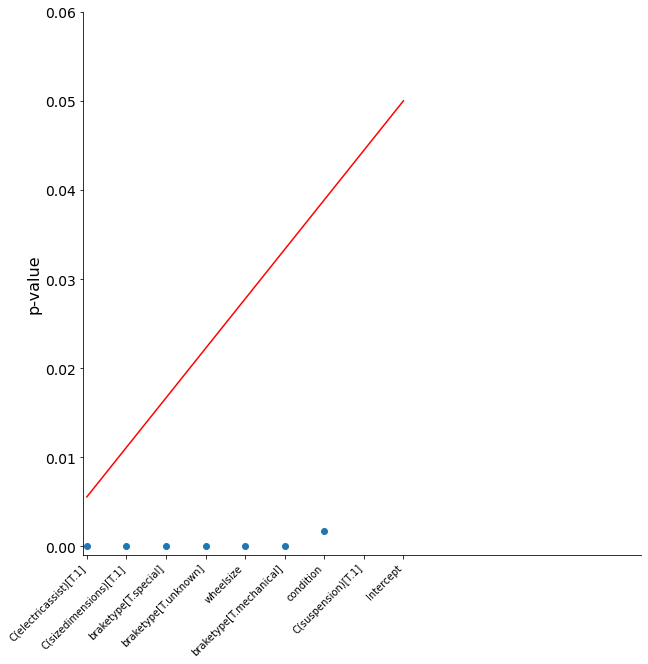

In [462]:
final_model = smf.ols(' price ~ + ' + ' + '.join(corr_candidates), data=df).fit()
df_p_values = final_model.summary2().tables[1].sort_values('P>|t|', ascending = True)
#df_p_values = df_p_values[df_p_values['P>|t|']<0.05]
n_vars = len(df_p_values)

plt.figure(figsize=(10, 10))

plt.plot(range(1, n_vars+1), df_p_values['P>|t|'], linewidth=0, marker='o')
plt.plot(range(1, n_vars+1), [0.05*i/n_vars for i in range(1, n_vars+1)], color='red')

plt.ylim([-0.001, 0.06])
plt.xlim([0.9, 15])

plt.xticks(ticks=range(1, n_vars+1), labels=df_p_values.index, rotation=45, ha='right')
plt.yticks(fontsize=14)

plt.ylabel('p-value', fontsize=16)

sns.despine()

In [463]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     110.0
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          5.22e-112
Time:                        23:15:08   Log-Likelihood:                -6097.3
No. Observations:                 793   AIC:                         1.221e+04
Df Residuals:                     785   BIC:                         1.225e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.1524    181.484     -0.012      0.991    -358.403     354.099
C(electricassist)[T.1]    919.6510     67.847     13.555      0.000     786.467    1052.835
braketype[T.mechanical]  -536.5827     81.304     -6.600      0.000    -696.183    -376.983
braketype[T.special]     -749.6109     68.397    -10.960      0.000    -883.874    -615.348
braketype[T.unknown]     -698.9592     70.448     -9.922      0.000    -837.247    -560.671
C(sizedimensions)[T.1]  -2.698e-12   2.19e-13    -12.317      0.000   -3.13e-12   -2.27e-12
C(suspension)[T.1]        -49.0278     50.523     -0.970      0.332    -148.203      50.148
wheelsize                  30.1472      4.298      7.014      0.000      21.710      38.584
condition                 108.8191     34.567      3.148      0.002      40.964     176.674
==============================================================================
Omnibus:                      383.723   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2143.085
Skew:                           2.183   Prob(JB):                         0.00
Kurtosis:                       9.768   Cond. No.                     5.45e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [464]:
final_model.summary2().tables[1].sort_values('P>|t|').round(3)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
C(electricassist)[T.1],919.651,67.847,13.555,0.000,786.467,1052.835
C(sizedimensions)[T.1],-0.000,0.000,-12.317,0.000,-0.000,-0.000
braketype[T.special],-749.611,68.397,-10.960,0.000,-883.874,-615.348
braketype[T.unknown],-698.959,70.448,-9.922,0.000,-837.247,-560.671
wheelsize,30.147,4.298,7.014,0.000,21.710,38.584
braketype[T.mechanical],-536.583,81.304,-6.600,0.000,-696.183,-376.983
condition,108.819,34.567,3.148,0.002,40.964,176.674
C(suspension)[T.1],-49.028,50.523,-0.970,0.332,-148.203,50.148
Intercept,-2.152,181.484,-0.012,0.991,-358.403,354.099


In [465]:
all_var_model = smf.ols(' price ~ + ' + ' + '.join(corr_important_attributes), data=df).fit()

In [466]:
all_var_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     29.13
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.41e-98
Time:                        23:15:08   Log-Likelihood:                -4994.0
No. Observations:                 656   AIC:                         1.005e+04
Df Residuals:                     625   BIC:                         1.019e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              173.6582    241.411      0.719      0.472    -300.416     647.733
bicycleframematerial[T.aluminum]      -118.7615     66.251     -1.793      0.074    -248.862      11.339
bicycleframematerial[T.carbon fiber]   753.0729    104.580      7.201      0.000     547.702     958.443
bicycleframematerial[T.composite]     -267.4718    237.082     -1.128      0.260    -733.045     198.102
bicycleframematerial[T.scandium]     -3.698e-13   4.58e-12     -0.081      0.936   -9.37e-12    8.63e-12
bicycleframematerial[T.steel]         -143.6016     73.106     -1.964      0.050    -287.166      -0.037
bicycleframematerial[T.titanium]       142.1306    365.495      0.389      0.698    -575.616     859.878
bicycleframematerial[T.unknown]       -230.4244     92.077     -2.503      0.013    -411.241     -49.608
bicycletype[T.cargo/pedicab]           923.1748    514.971      1.793      0.074     -88.108    1934.457
bicycletype[T.cruiser]                -210.0301     99.173     -2.118      0.035    -404.783     -15.277
bicycletype[T.cyclocross]              485.2989    263.968      1.838      0.066     -33.073    1003.671
bicycletype[T.folding]                 172.5238    156.575      1.102      0.271    -134.954     480.001
bicycletype[T.gravel]                 -310.9052    211.881     -1.467      0.143    -726.990     105.179
bicycletype[T.hybrid/comfort]         -144.2834     97.946     -1.473      0.141    -336.626      48.059
bicycletype[T.kids]                   -177.0437     93.656     -1.890      0.059    -360.963       6.876
bicycletype[T.mountain]               -106.4306     88.863     -1.198      0.231    -280.937      68.075
bicycletype[T.recumbent/trike]         564.9677    237.735      2.376      0.018      98.111    1031.825
bicycletype[T.road]                   -100.2087     92.828     -1.080      0.281    -282.501      82.084
bicycletype[T.tandem]                  442.4355    301.415      1.468      0.143    -149.473    1034.344
bicycletype[T.track]                    -5.2331    240.652     -0.022      0.983    -477.817     467.351
bicycletype[T.unicycle]                239.3992    269.711      0.888      0.375    -290.250     769.048
bicycletype[T.unknown]                 243.9461    116.170      2.100      0.036      15.815     472.077
braketype[T.mechanical]               -430.1511     86.622     -4.966      0.000    -600.256    -260.046
braketype[T.special]                  -599.1815     75.471     -7.939      0.000    -747.389    -450.974
braketype[T.unknown]                  -537.0171     80.464     -6.674      0.000    -695.031    -379.004
C(electricassist)[T.1]                 896.6257     82.382     10.884      0.000     734.847    1058.404
handlebartype[T.unknown]              

In [467]:
all_var_model.summary2().tables[1].sort_values('P>|t|').round(3)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
C(electricassist)[T.1],896.626,82.382,10.884,0.000,734.847,1058.404
braketype[T.special],-599.182,75.471,-7.939,0.000,-747.389,-450.974
bicycleframematerial[T.carbon fiber],753.073,104.580,7.201,0.000,547.702,958.443
braketype[T.unknown],-537.017,80.464,-6.674,0.000,-695.031,-379.004
braketype[T.mechanical],-430.151,86.622,-4.966,0.000,-600.256,-260.046
wheelsize,27.026,7.343,3.680,0.000,12.606,41.446
bicycleframematerial[T.unknown],-230.424,92.077,-2.503,0.013,-411.241,-49.608
condition,92.183,37.792,2.439,0.015,17.968,166.398
bicycletype[T.recumbent/trike],564.968,237.735,2.376,0.018,98.111,1031.825
bicycletype[T.cruiser],-210.030,99.173,-2.118,0.035,-404.783,-15.277
